# <span style="color:blue; font-size:16;">Eample saspy notebook showing the python interface to SAS</span>

# Import HTML to use to display results from the LST

In [1]:
from IPython.display import HTML 

# Import the saspy module to get access to SAS 

In [2]:
import saspy

### Instantiate a SASsession object. This creates the SAS session that will be used for this notebook

In [3]:
sas = saspy.SASsession(results='HTML')

Please enter the name of the SAS Config you wish to run. Available Configs are: ['default', 'mikeiom', 'SASgrid', 'http', 'httptest', 'ssh', 'httpfred', 'grid', 'tdi', 'tdilat', 'iomj', 'iomc', 'iomjwin', 'winiomj', 'winiomjwin', 'winlocal', 'gridiom', 'wingridiom'] tdi
SAS Connection established. Subprocess id is 17550



### Delete the '#' sign bellow (comment), and put the cursor after the dot (.) and hit Tab. It will show you the methods available from the SASsession object

In [4]:
#sas.

### Create a SASdata object to use to access the cars data set in the sashelp library. 

In [5]:
cars = sas.sasdata('cars', libref='sashelp')

### Again, remove the comment character, #, and after the dot, hit Tab to see the methods available on the SASdata object

In [6]:
#cars.


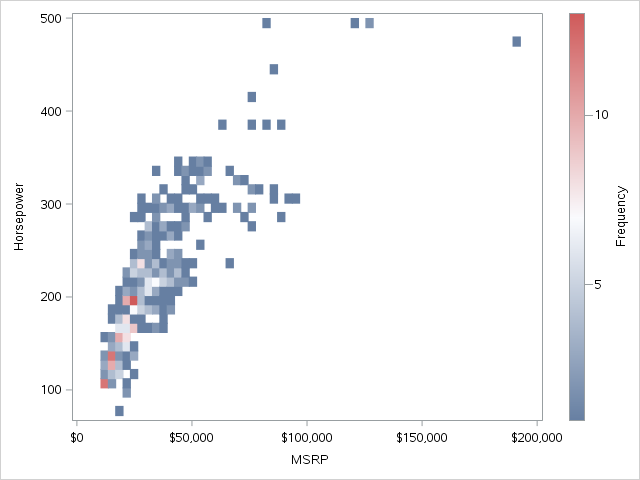

In [7]:
cars.heatmap('msrp','horsepower')

In [8]:
#cars.describe()
#cars.head()
cars.tail()

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
424,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5,197,21,28,3450,105,186
425,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5,242,20,26,3450,105,186
426,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6,268,19,26,3653,110,190
427,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4,170,22,29,2822,101,180
428,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5,208,20,27,3823,109,186



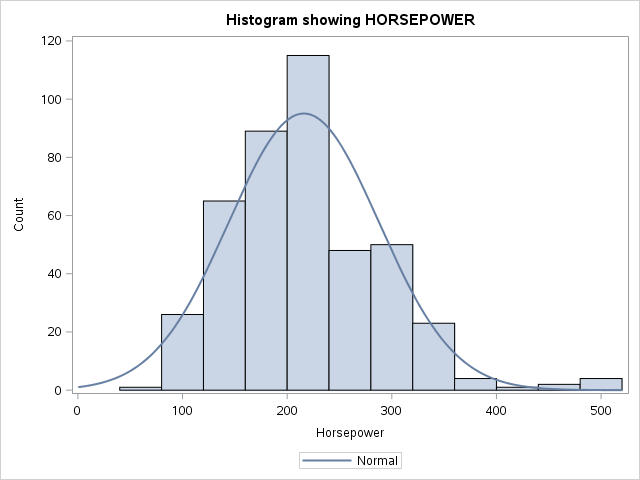


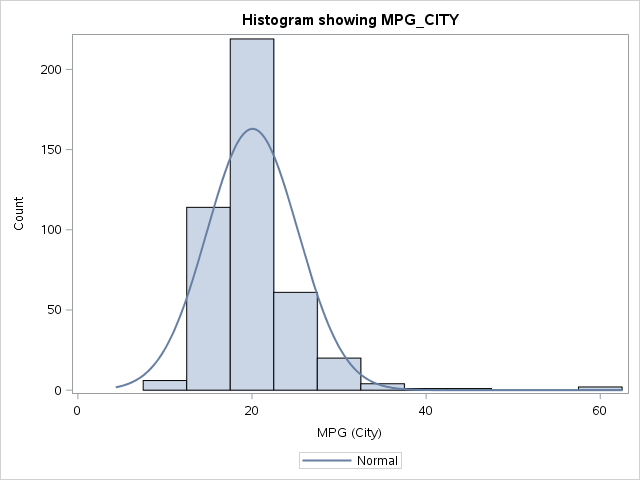


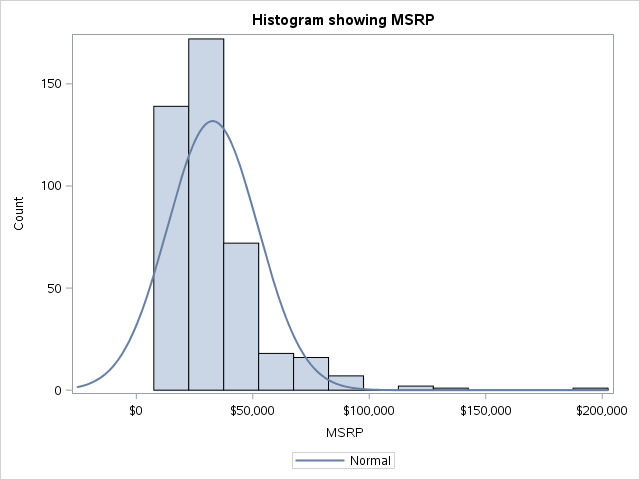

In [9]:
for col in ['horsepower','MPG_City', 'MSRP']:
    cars.hist(col, title='Histogram showing '+col.upper())

#### Try out any other methods too. To see the method signature (parameters and return type) just type the method with a ? at the end and submit;<br><br>**<span style="color:blue; font-size:16;">cars.hist?</span>**<br><br>This will pop up a window at the bottome and show information about the method.

In [10]:
cars.hist?

### The SASsession object has a **submit** method to submit any SAS code you want.<br>It returns a dictionary with the LOG and the LST.<br>You can print the log and HTML the results from the Listing. <br> You can also prompt for macro variable substitution at runtime!

In [11]:
ll = sas.submit('data &dsname; user="&user"; hidden="&pw"; run; proc print data=&dsname;run;', prompt={'user': False, 'pw': True, 'dsname': False})

Please enter value for macro variable pw ········
Please enter value for macro variable dsname data_one
Please enter value for macro variable user tom


In [12]:
HTML(ll['LST'])

Obs,user,hidden
1,tom,this is not my real password


In [13]:
print(ll['LOG'])


121  ods listing close;ods html5 (id=saspy_internal) file=stdout options(bitmap_mode='inline') device=svg; ods graphics on /
121! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: STDOUT
122  
123  options nosource nonotes;
126  %let dsname=data_one;
127  %let user=tom;
128  data &dsname; user="&user"; hidden="&pw"; run; proc print data=&dsname;run;
NOTE: The data set WORK.DATA_ONE has 1 observations and 2 variables.
NOTE: DATA statement used (Total process time):
      real time           0.00 seconds
      cpu time            0.00 seconds
      
NOTE: There were 1 observations read from the data set WORK.DATA_ONE.
NOTE: PROCEDURE PRINT used (Total process time):
      real time           0.00 seconds
      cpu time            0.00 seconds
      
129  options nosource nonotes;
132  
133  ods html5 (id=saspy_internal) close;ods listing;

134  


#### You can always see the entire session log by using the saslog() method of the SASsession object.

In [14]:
#print(sas.saslog())

In [15]:
ll = sas.submit('libname work list;')

In [16]:
print(ll['LOG'])


136  ods listing close;ods html5 (id=saspy_internal) file=stdout options(bitmap_mode='inline') device=svg; ods graphics on /
136! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: STDOUT
137  
138  libname work list;
NOTE: Libref=   WORK 
      Scope=    Kernel  
      Engine=   V9
      Access=   TEMP
      Physical Name= /usr/tmp/SAS_work39EB0000448E_tom64-3
      Filename= /usr/tmp/SAS_work39EB0000448E_tom64-3
      Inode Number= 3539056
      Access Permission= rwx------
      Owner Name= sas
      File Size=              4KB
      File Size (bytes)= 4096
139  
140  ods html5 (id=saspy_internal) close;ods listing;

141  


## Want to read and write CSV files?

In [17]:
cars.to_csv('/tmp/cars.csv')


149  
150  options nosource;
ERROR: Insufficient authorization to access /tmp/cars.csv.
NOTE: The SAS System stopped processing this step because of errors.
NOTE: There were 1 observations read from the data set SASHELP.CARS.
NOTE: DATA statement used (Total process time):
      real time           0.00 seconds
      cpu time            0.00 seconds
      
0 records created in X from SASHELP.CARS.
  
  
NOTE: "X" file was successfully created.
NOTE: PROCEDURE EXPORT used (Total process time):
      real time           0.19 seconds
      cpu time            0.05 seconds
      
237  
238  
239  


In [18]:
carscsv = sas.read_csv('/tmp/cars.csv', 'cars_cvs')

In [19]:
carscsv.tail(7)

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
422,Volvo,S80 2.9 4dr,Sedan,Europe,Front,"$37,730","$35,542",2.9,6,208,20,28,3576,110,190
423,Volvo,S80 2.5T 4dr,Sedan,Europe,All,"$37,885","$35,688",2.5,5,194,20,27,3691,110,190
424,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5,197,21,28,3450,105,186
425,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5,242,20,26,3450,105,186
426,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6,268,19,26,3653,110,190
427,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4,170,22,29,2822,101,180
428,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5,208,20,27,3823,109,186


In [20]:
 carscsv.describe()

Variable,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
EngineSize,428,0,3.000000,3.196729,1.108595,1.300000,2.350000,3.000000,3.900000,8.300000
Cylinders,426,2,6.000000,5.807512,1.558443,3.000000,4.000000,6.000000,6.000000,12.000000
Horsepower,428,0,210.000000,215.885514,71.836032,73.000000,165.000000,210.000000,255.000000,500.000000
MPG_City,428,0,19.000000,20.060748,5.238218,10.000000,17.000000,19.000000,21.500000,60.000000
MPG_Highway,428,0,26.000000,26.843458,5.741201,12.000000,24.000000,26.000000,29.000000,66.000000
Weight,428,0,3474.500000,3577.953271,758.983215,1850.000000,3103.000000,3474.500000,3978.500000,7190.000000
Wheelbase,428,0,107.000000,108.154206,8.311813,89.000000,103.000000,107.000000,112.000000,144.000000
Length,428,0,187.000000,186.362150,14.357991,143.000000,178.000000,187.000000,194.000000,238.000000


## We can transfer data between SAS Data Sets and Pandas Data Frames 

In [21]:
import pandas

In [22]:
car_df = cars.to_df()

In [23]:
car_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945,33337,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820,21761,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990,24647,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195,30299,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755,39014,3.5,6.0,225,18,24,3880,115,197


In [24]:
cars.head()

Obs,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6,265,17,23,4451,106,189
2,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4,200,24,31,2778,101,172
3,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4,200,22,29,3230,105,183
4,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6,270,20,28,3575,108,186
5,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6,225,18,24,3880,115,197


In [25]:
car_df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int64
Invoice          int64
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [26]:
cars.contents()

 Data Frames **describe** method matches up with our Proc Means. SASdata object has the **describe** method (and **means** as an alias method)

In [27]:
car_df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


In [28]:
cars.means()

Variable,Label,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
MSRP,,428,0,27635,32775,19432,10280,20330,27635,39215,192465
Invoice,,428,0,25295,30015,17642,9875.000000,18851,25295,35733,173560
EngineSize,Engine Size (L),428,0,3.000000,3.196729,1.108595,1.300000,2.350000,3.000000,3.900000,8.300000
Cylinders,,426,2,6.000000,5.807512,1.558443,3.000000,4.000000,6.000000,6.000000,12.000000
Horsepower,,428,0,210.000000,215.885514,71.836032,73.000000,165.000000,210.000000,255.000000,500.000000
MPG_City,MPG (City),428,0,19.000000,20.060748,5.238218,10.000000,17.000000,19.000000,21.500000,60.000000
MPG_Highway,MPG (Highway),428,0,26.000000,26.843458,5.741201,12.000000,24.000000,26.000000,29.000000,66.000000
Weight,Weight (LBS),428,0,3474.500000,3577.953271,758.983215,1850.000000,3103.000000,3474.500000,3978.500000,7190.000000
Wheelbase,Wheelbase (IN),428,0,107.000000,108.154206,8.311813,89.000000,103.000000,107.000000,112.000000,144.000000
Length,Length (IN),428,0,187.000000,186.362150,14.357991,143.000000,178.000000,187.000000,194.000000,238.000000


## Now round trip the Data Frame back to a SAS Data Set

In [29]:
cars_full_circle = sas.df2sd(car_df, 'cfc')

In [30]:
cars_full_circle.describe()

Variable,N,N Miss,Median,Mean,Std Dev,Minimum,25th Pctl,50th Pctl,75th Pctl,Maximum
MSRP,428,0,27635,32775,19432,10280,20330,27635,39215,192465
Invoice,428,0,25295,30015,17642,9875.000000,18851,25295,35733,173560
EngineSize,428,0,3.000000,3.196729,1.108595,1.300000,2.350000,3.000000,3.900000,8.300000
Cylinders,426,2,6.000000,5.807512,1.558443,3.000000,4.000000,6.000000,6.000000,12.000000
Horsepower,428,0,210.000000,215.885514,71.836032,73.000000,165.000000,210.000000,255.000000,500.000000
MPG_City,428,0,19.000000,20.060748,5.238218,10.000000,17.000000,19.000000,21.500000,60.000000
MPG_Highway,428,0,26.000000,26.843458,5.741201,12.000000,24.000000,26.000000,29.000000,66.000000
Weight,428,0,3474.500000,3577.953271,758.983215,1850.000000,3103.000000,3474.500000,3978.500000,7190.000000
Wheelbase,428,0,107.000000,108.154206,8.311813,89.000000,103.000000,107.000000,112.000000,144.000000
Length,428,0,187.000000,186.362150,14.357991,143.000000,178.000000,187.000000,194.000000,238.000000


# Now let's look at the SASstat object!

In [31]:
stat = sas.sasstat()

In [32]:
#stat.                 # use the 'dot Tab ' to see the methods available

### Let's run a regression which will return us a SASresults object that we can use to see any/all of the results

In [33]:
stat_results = stat.reg(model='horsepower = Cylinders EngineSize',data=cars)

In [34]:
dir(stat_results)

['ANOVA',
 'COOKSDPLOT',
 'DFBETASPANEL',
 'DFFITSPLOT',
 'DIAGNOSTICSPANEL',
 'FITSTATISTICS',
 'LOG',
 'NOBS',
 'OBSERVEDBYPREDICTED',
 'PARAMETERESTIMATES',
 'QQPLOT',
 'RESIDUALBOXPLOT',
 'RESIDUALBYPREDICTED',
 'RESIDUALHISTOGRAM',
 'RESIDUALPLOT',
 'RFPLOT',
 'RSTUDENTBYLEVERAGE',
 'RSTUDENTBYPREDICTED']

### Pick any one you want ...


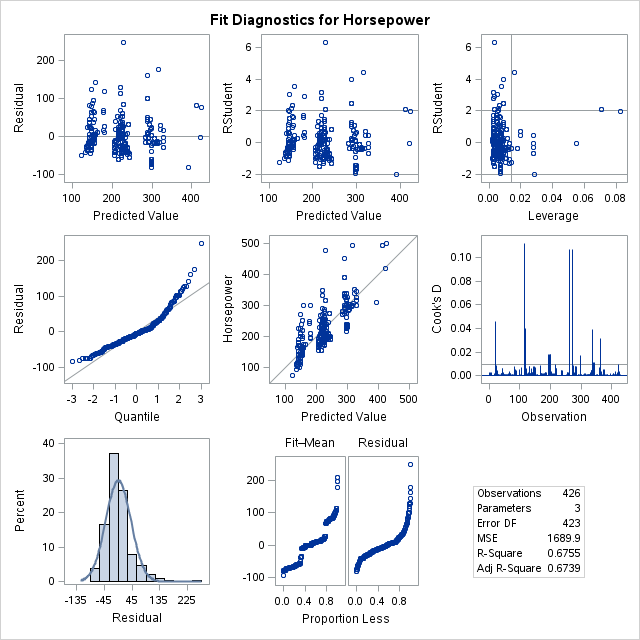

In [35]:
stat_results.DIAGNOSTICSPANEL

### Or display them ALL  (Click in the pannel to the Left of the results below to expand/shrink the result pane)


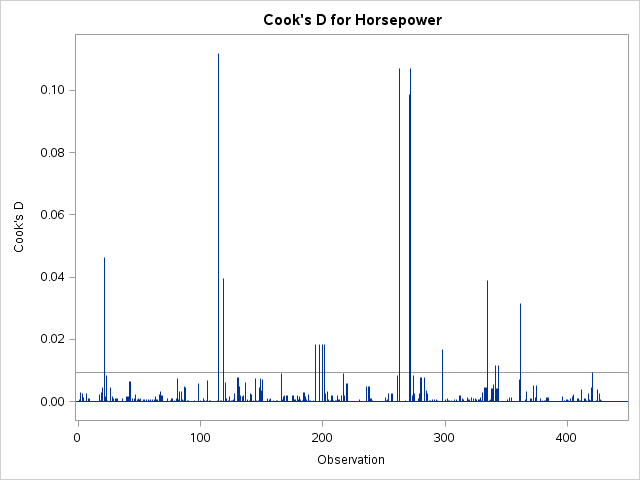


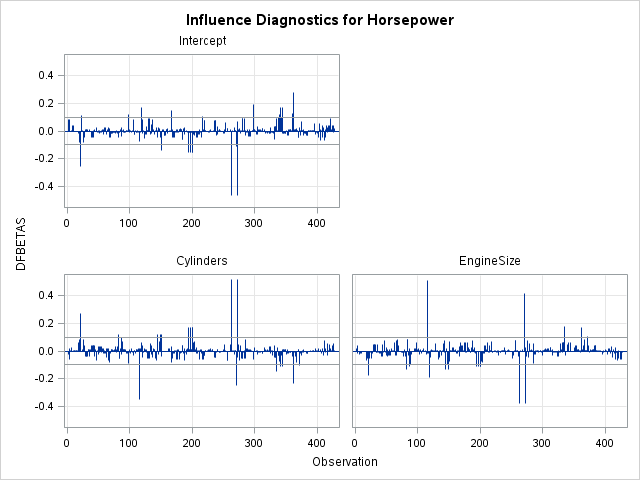


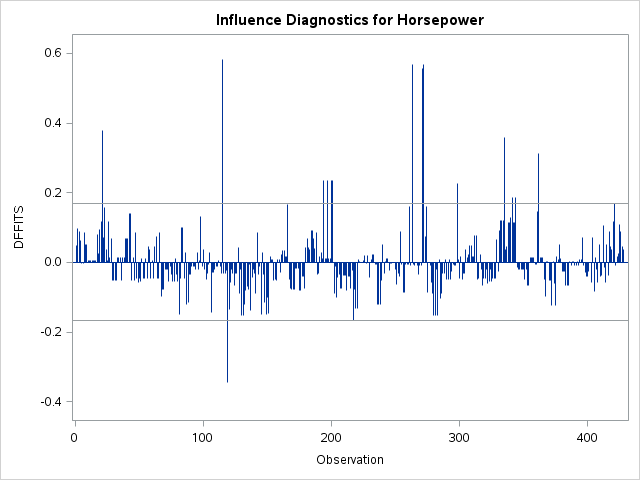


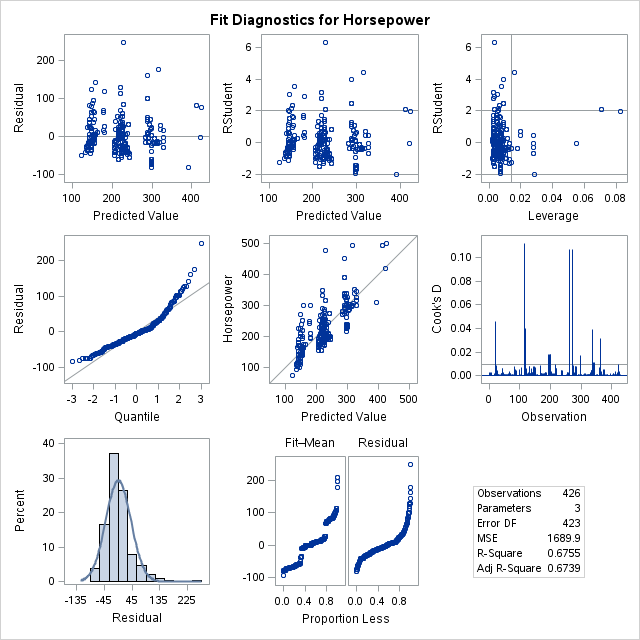

Root MSE,41.10897,R-Square,0.6755
Dependent Mean,215.87793,Adj R-Sq,0.6739
Coeff Var,19.04269,,


Number of Observations Read,428
Number of Observations Used,426
Number of Observations with Missing Values,2



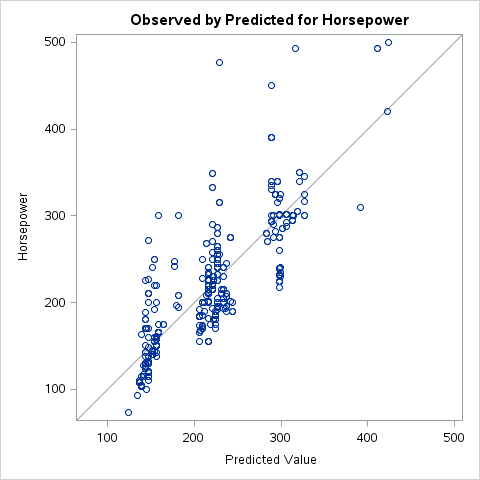


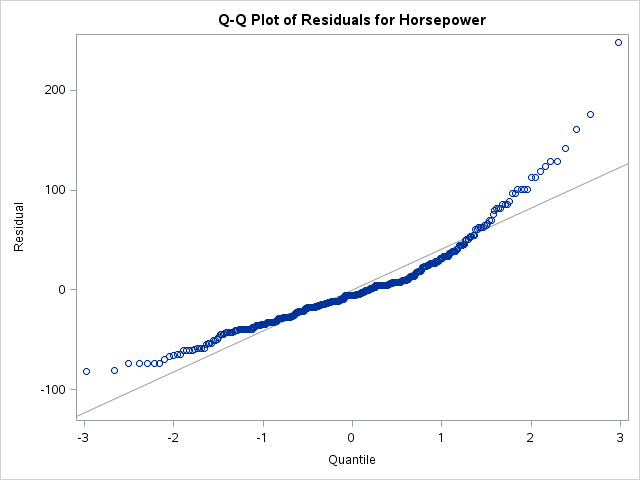


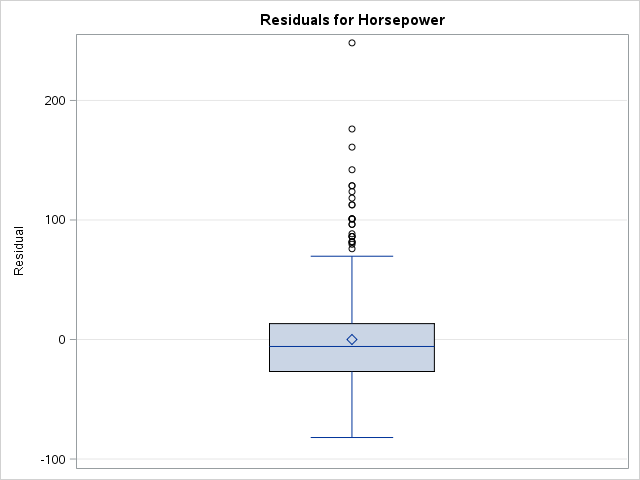


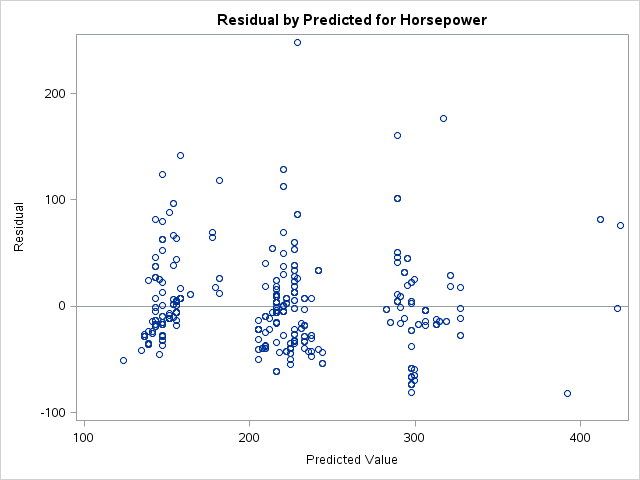


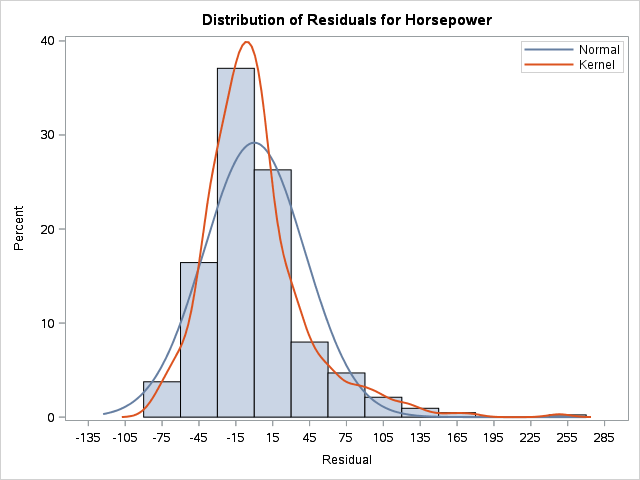


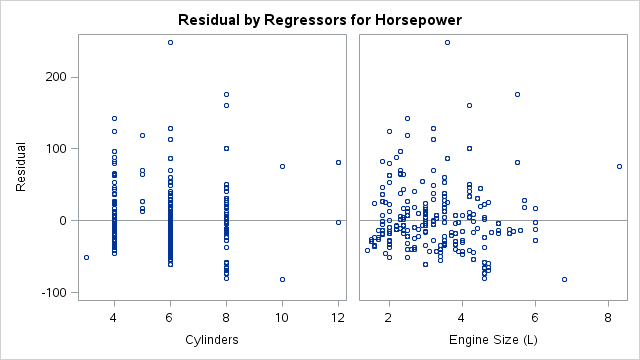


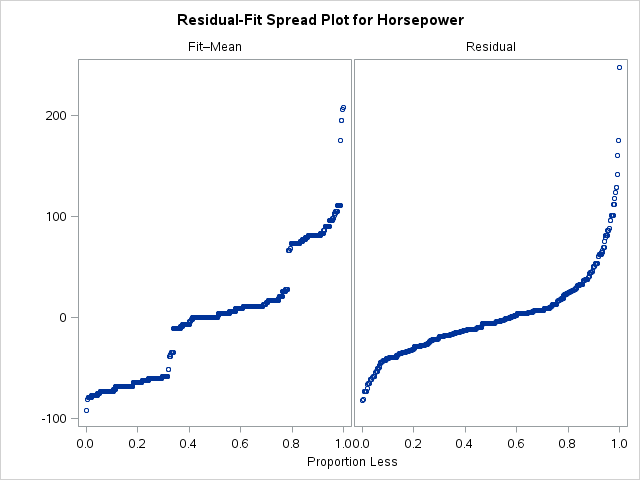


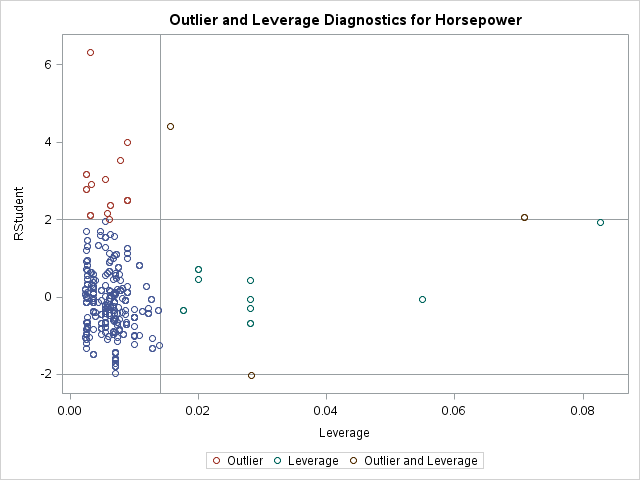


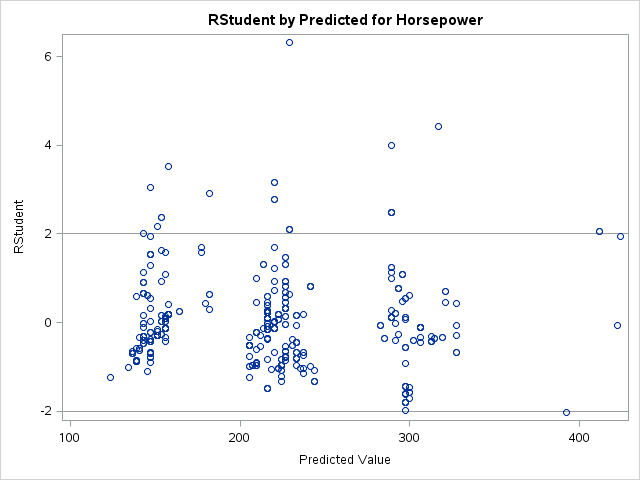

In [36]:
stat_results.ALL()

### Proc SQL anyone???  
#### And you can use the SASLIB method of the SASsession to assign any data you like (Teradata, Hadoop, ...)

In [37]:
#sas.saslib('Tera', engine='Teradata', options='user=$me pw=$mypw server=teracop1', prompt={'me': False, 'mypw': True})
ll = sas.submit('proc sql; create table sales as select month, sum(actual) as tot_sales, sum(predict) as predicted_sales from sashelp.prdsale group by 1 order by month ;quit;')
sales = sas.sasdata('sales')

In [38]:
print(ll['LOG']) #;HTML(ll['LST'])   except there isn't anything in the LST from this code


1214  ods listing close;ods html5 (id=saspy_internal) file=stdout options(bitmap_mode='inline') device=svg; ods graphics on /
1214! outputfmt=png;
NOTE: Writing HTML5(SASPY_INTERNAL) Body file: STDOUT
1215  
1216  proc sql;
1216!           create table sales as select month, sum(actual) as tot_sales, sum(predict) as predicted_sales from sashelp.prdsale
1216! group by 1 order by month ;quit;
NOTE: Table WORK.SALES created, with 24 rows and 3 columns.

NOTE: PROCEDURE SQL used (Total process time):
      real time           0.00 seconds
      cpu time            0.00 seconds
      
1217  
1218  ods html5 (id=saspy_internal) close;ods listing;

1219  


### Let's chart our sales for the aggregate table we created with the Proc SQL


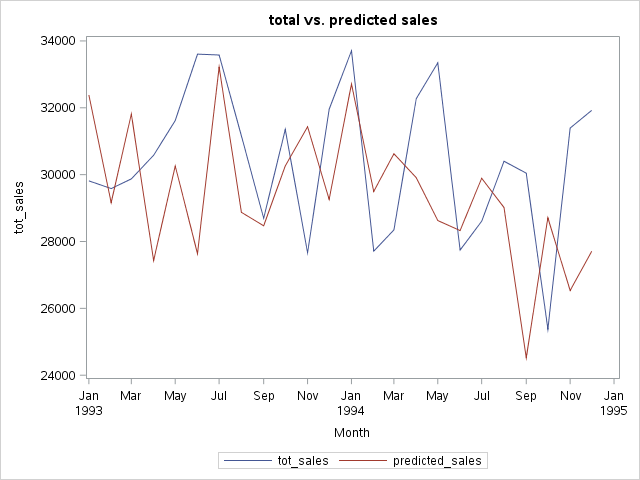

In [39]:
sales.series(y=['tot_sales','predicted_sales'], x='month', title='total vs. predicted sales')

## Try the ETS object; including cheking an error case first

In [40]:
ets = sas.sasets()

In [41]:
ets_results = ets.timeid(id='horsepower', data=cars)

In [42]:
dir(ets_results)

['DECOMPOSITIONPLOT',
 'INTERVALCOUNTSCOMPONENTPLOT',
 'LOG',
 'OFFSETCOMPONENTPLOT',
 'SPANCOMPONENTPLOT',
 'VALUESPLOT']


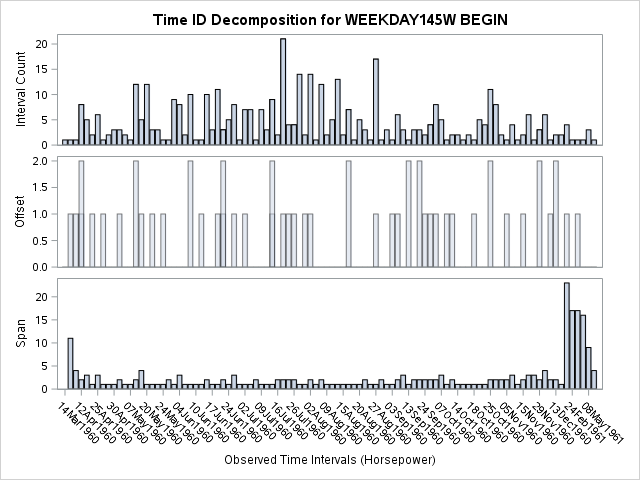

In [43]:
ets_results.DECOMPOSITIONPLOT

In [44]:
#ets_results.ALL()

## How would we get these results in a batch python script? Set batch to True and get the HTML returned to you to write out to a file and view later

In [45]:
sas.set_batch (True)

In [46]:
q = ets_results.DECOMPOSITIONPLOT

### q is the Dict with the LOG and LST. The LST is the HTML of the result. We'll display it here, but if you write it to a file it will render when you open it in a web browser too.


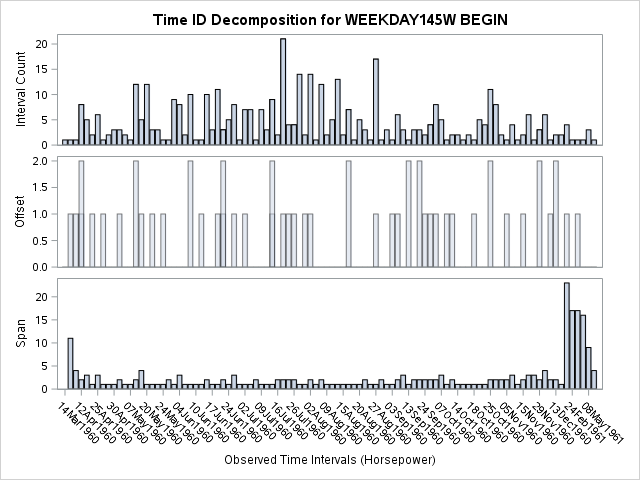

In [47]:
HTML(q['LST'])

### the ALL() method returns a List of Dict's which is easy to traverse. Can write them out to their own files to view later. Just display them here for now.


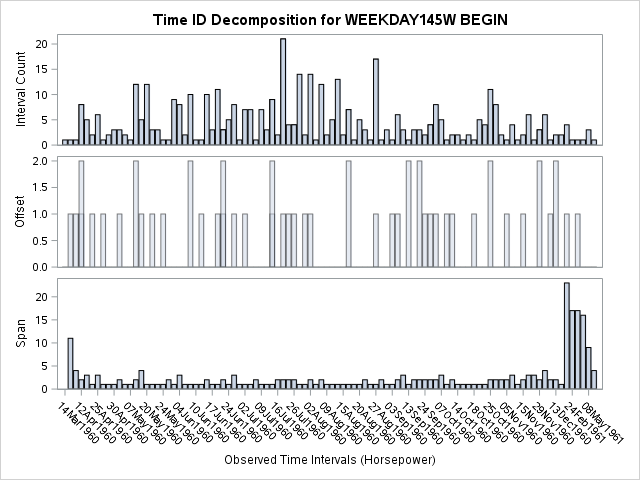


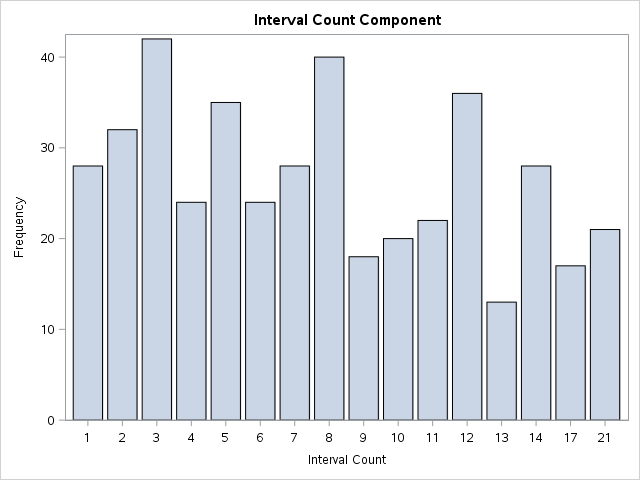


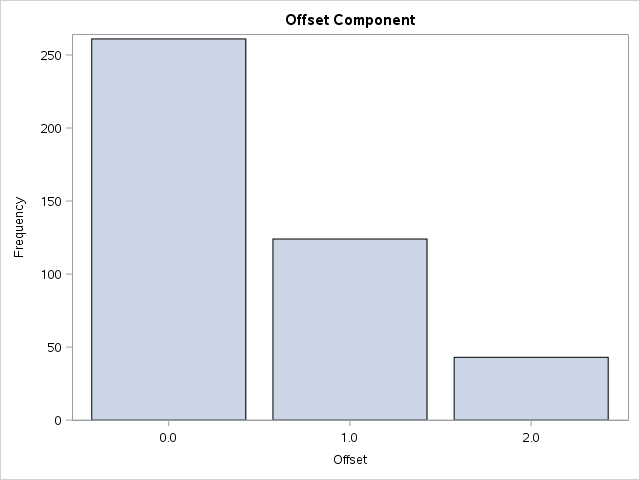


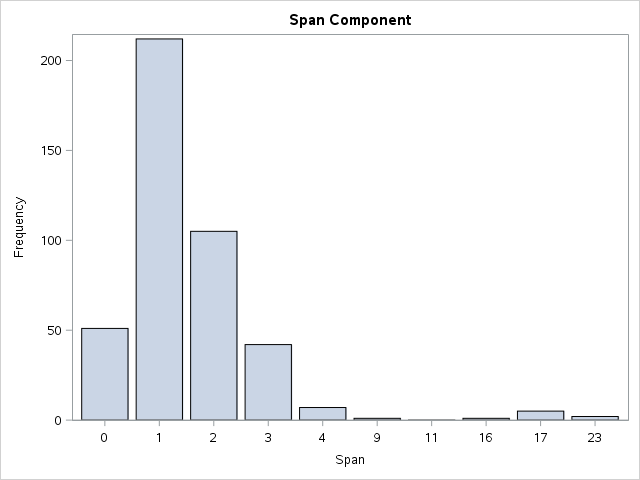


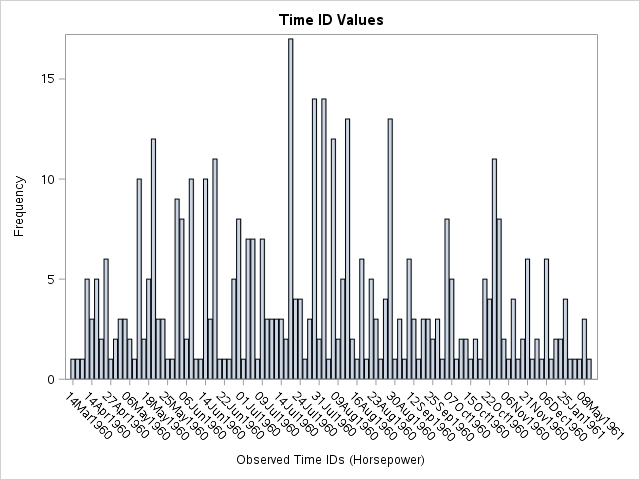

In [48]:
from IPython.display import display as DIS
x = ets_results.ALL()
for i in range(len(x)):
    if isinstance(x[i], dict):
        DIS(HTML(x[i]['LST']))
    else:
        print(x[i])

## So lets write these out to the file system as if this were a python batch script

In [49]:
for i in range(len(ets_results._names)):
    x = ets_results.__getattr__(ets_results._names[i])
    if type(x) is not str:
        out1 = open("/u/sastpw/saspy_demo/"+ets_results._names[i]+".html", mode='w+b')
        out1.write(x['LST'].encode())
        out1.close()
    else:
        out1 = open("/u/sastpw/saspy_demo/"+ets_results._names[i]+".log", mode='w+b')
        out1.write(x.encode())
        out1.close()

In [50]:
sas.set_batch (False)

## Now, let's learn a little SAS. With teach_me_SAS, any of the methods that run code will show you the code instead of running it. This way you can cut-n-paste it into a sas.submit() method and change it around and play with syntax and try your own version of code.

In [51]:
sas.teach_me_SAS(True)

In [52]:
sales.series(y=['tot_sales','predicted_sales'], x='month', title='total vs. predicted sales')

proc sgplot data=WORK.sales;
	title "total vs. predicted sales";
	series x=month y=tot_sales;
	series x=month y=predicted_sales;
run;
title "";


In [53]:
ets_results = ets.timeid(id='horsepower', data=cars)

%macro proccall(d);
proc timeid data=sashelp.cars plot=all  ;
id horsepower;
run; quit; %mend;
%mangobj(tim0003,timeid,cars);


In [54]:
stat_results = stat.reg(model='horsepower = Cylinders EngineSize', data=cars)

%macro proccall(d);
proc reg data=sashelp.cars plot=all  ;
model horsepower = Cylinders EngineSize;
run; quit; %mend;
%mangobj(reg0004,reg,cars);


In [55]:
cars.describe()

proc means data=sashelp.cars stackodsoutput n nmiss median mean std min p25 p50 p75 max;run;


In [56]:
cars.tail(24)

proc print data=sashelp.cars(obs=428 firstobs=405 );run;


In [57]:
sas.teach_me_SAS(False)

## The following isn't needed, SAS will shutdown when you stop the notebook. But you can shut it down manually if you want

In [58]:
#sas._endsas() 